In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as stat

In [2]:
m20 = np.load('/Users/jsmonzon/lbg_da/tau_data/test/tau.npy')

covar = np.load('/Users/jsmonzon/lbg_da/tau_data/test/covar.npy')

z_range = np.linspace(2.0, 3.0, 100)

In [4]:
print(max(m20[0]), min(m20[0]), np.median(m20[0]))

2.4469966888427734 2.028470277786255 2.2228949069976807


In [3]:
#the function to fit to
def tau_ev(z,A,B):
    return A*((1+z)/(1+2.22))**B

In [4]:
def sigma_tau(z, A, B, A_err, B_err):
    
    dtau_dA = ((1+z) / (1+2.22))**B
    
    dtau_dB = (A*B)*((1+z) / (1+2.22))**(B-1)
    
    return np.sqrt((dtau_dA * A_err)**2 + (dtau_dB * B_err)**2)

In [5]:
#def tau_const(z, A):
#    return A

#0.143 +- 0.001

In [7]:
popt, pcov = opt.curve_fit(tau_ev, m20[0], m20[1], sigma=covar) #sigma = np.sqrt(np.diagonal(covar))

In [8]:
sig_ev = sigma_tau(z_range, popt[0], popt[1], pcov[0,0], pcov[1,1])

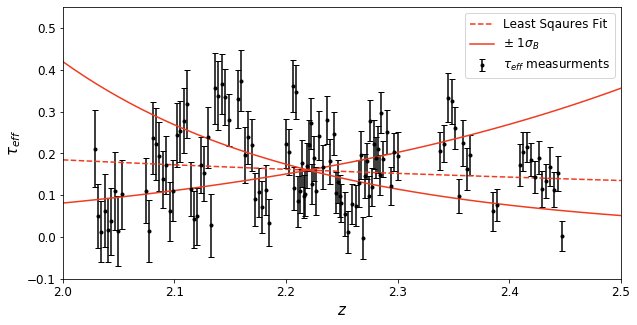

In [14]:
plt.figure(figsize=(10,5))

plt.errorbar(m20[0], m20[1], yerr=np.sqrt(np.diagonal(covar)), fmt=".",color="black", capsize=3, label="$τ_{eff}$ measurments")
plt.plot(z_range, tau_ev(z_range, popt[0], popt[1]), color="#f03b20", ls="--", label="Least Sqaures Fit")
#plt.hlines(.143, 2,3, ls="--", label="constant", color="blue")

plt.plot(z_range, tau_ev(z_range, popt[0], popt[1]+pcov[1,1]), color="#f03b20", label="$\pm\ 1 \sigma_{B}$") #B error
plt.plot(z_range, tau_ev(z_range, popt[0], popt[1]-pcov[1,1]), color="#f03b20")


plt.xlabel("$z$",fontsize=15)
plt.ylabel("$τ_{eff}$",fontsize=15)

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(2.0, 2.5)
plt.ylim(-.1,.55)

#plt.savefig("/Users/jsmonzon/lbg_da/figures/least_squares.pdf")
plt.show()


In [ ]:
#add the covariance term sigmaAB in the text
#leave the figure as is
#s#we are ingoring systematic errors which we guess are at least 10%


In [16]:
np.median(m20[1])

0.16908375610016213